In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [314]:
df=pd.read_csv("train.csv")
df=df.fillna(df.mean())
df=df.fillna(' ')

In [315]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [316]:
s=0
male=[]
female=[]
h=[]
for i in df["Survived"]:
    if i==1 and df["Sex"][s]=="female":
        female.append(1)
    elif i==1 and df["Sex"][s]=="male":
        male.append(1)
    h.append(s)
    s+=1
print(len(female),len(male))
#conclusion more female where saved

233 109


In [317]:
s=0
dmale=[]
dfemale=[]
for i in df["Survived"]:
    if i==0 and df["Sex"][s]=="female":
        dfemale.append(1)
    elif i==0 and df["Sex"][s]=="male":
        dmale.append(1)
    s+=1
print(len(dfemale),len(dmale))
#conclusion more male died
f=[len(female),len(male),len(dfemale),len(dmale)]
print(f)
label=["Female","Male","Dead Female","Dead Male"]

81 468
[233, 109, 81, 468]


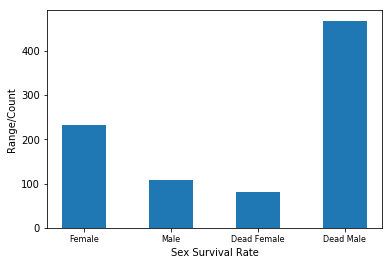

In [318]:
plt.bar([0,1,2,3],f,width=0.5)
plt.xticks([0,1,2,3],label,fontsize=8)
plt.xlabel("Sex Survival Rate")
plt.ylabel("Range/Count")
plt.show()

In [319]:
category3=df[df["Pclass"]==3]
print(len(category3["Survived"]))
print(np.sum(category3["Survived"]==True))
cs3=np.sum(category3["Survived"]==True)
dcs3=abs(np.sum(category3["Survived"]==True)-len(category3["Survived"]))
#Survival of Pclass3 is less
print((cs3/len(category3["Survived"]))*100)
#24.23% survived

491
119
24.2362525458


In [320]:
category2=df[df["Pclass"]==2]
print(len(category2["Survived"]))
print(np.sum(category2["Survived"]==True))
cs2=np.sum(category2["Survived"]==True)
dcs2=abs(np.sum(category2["Survived"]==True)-len(category2["Survived"]))
#Survival of Pclass2 is better
print((cs2/len(category2["Survived"]))*100)
#47.28% survived

184
87
47.2826086957


In [321]:
category1=df[df["Pclass"]==1]
print(len(category1["Survived"]))
print(np.sum(category1["Survived"]==True))
cs1=np.sum(category1["Survived"]==True)
dcs1=abs(np.sum(category1["Survived"]==True)-len(category1["Survived"]))
#Survival of Pclass1 is best no surprise :)
print((cs1/len(category1["Survived"]))*100)
#62.96

216
136
62.962962963


[119, 87, 136, 372, 97, 80]


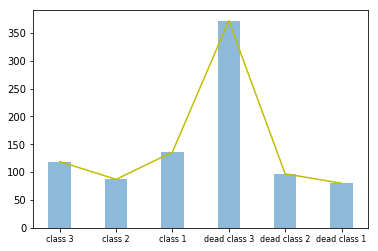

In [322]:
sclasses=[cs3,cs2,cs1,dcs3,dcs2,dcs1]
print(sclasses)
plt.plot(sclasses,color="y")
plt.bar([0,1,2,3,4,5],sclasses,width=0.4,alpha=0.5)
plt.xticks([0,1,2,3,4,5],["class 3","class 2","class 1","dead class 3","dead class 2","dead class 1"],fontsize=8)
plt.show()

342
28.54977812177503


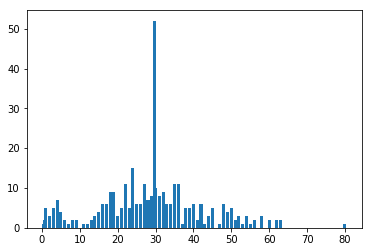

In [323]:
survivalage=df[df["Survived"]==1]
agecount=len(survivalage["Age"])
print(agecount)
print(np.mean(survivalage["Age"]))
k=[]
f={}
for i in survivalage["Age"]:
    f[i]=survivalage["Age"].tolist().count(i)
    k.append(survivalage["Age"].tolist().count(i))
#print(f)
plt.bar(list(f.keys()),list(f.values()))
plt.show()

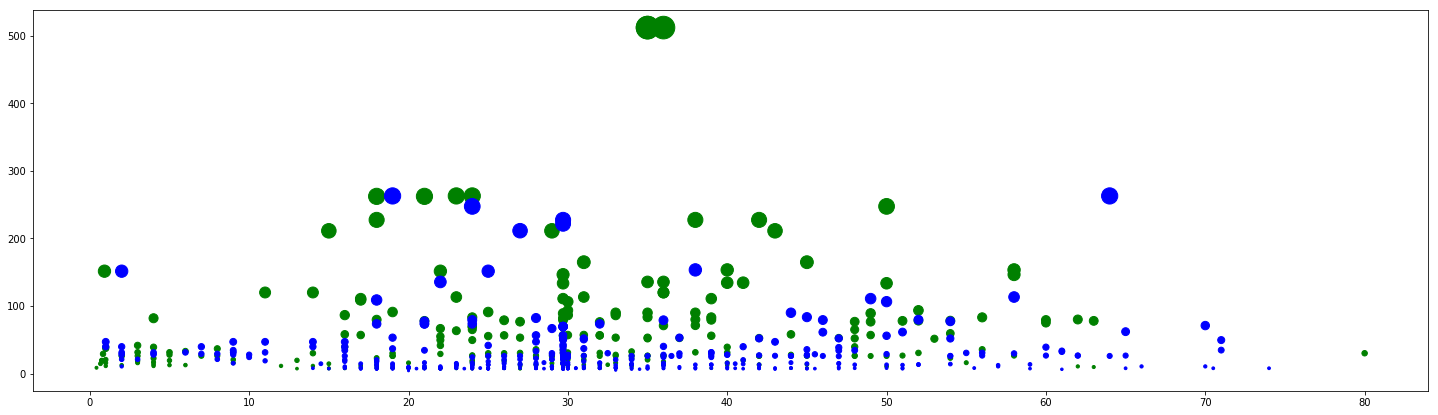

In [331]:
plt.figure(figsize=(25,7))
plt.scatter(survivalage["Age"],survivalage["Fare"],c='g',s=survivalage["Fare"])#s=size and c=color
plt.scatter(df[df["Survived"]==0]["Age"],df[df["Survived"]==0]["Fare"],c='b',s=df[df["Survived"]==0]["Fare"])
plt.show()
#conclusion is here that people between age of 30-40 were saved most
#fascinating fact is that the people with high fare were saved mostly
#green circle represents them and the size represent the fare and the blue one's are dead

In [332]:
df["x_male"]=0
df["x_female"]=0
s=0
for i in df["Sex"]:
    if i=="male":
        df["x_male"][s]=1
    else:
        df["x_male"][s]=0
    s+=1
s=0
for i in df["Sex"]:
    if i=="female":
        df["x_female"][s]=1
    else:
        df["x_female"][s]=0
    s+=1

C:\Users\tusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\tusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is t

In [333]:
#target variable
Y = df["Survived"]
print(Y)

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [340]:
#del df["Sex"]
#del df["died"]
#del df["Survived"]
#del df["Name"]
#del df["Cabin"]
#del df["SibSp"]
#del df["Parch"]
#del df["Embarked"]
#del df["Ticket"]
#del df["Cabin"]

In [339]:
print(df)
#del df["PassengerId"]

     Pclass        Age      Fare  x_male  x_female
0         3  22.000000    7.2500       1         0
1         1  38.000000   71.2833       0         1
2         3  26.000000    7.9250       0         1
3         1  35.000000   53.1000       0         1
4         3  35.000000    8.0500       1         0
5         3  29.699118    8.4583       1         0
6         1  54.000000   51.8625       1         0
7         3   2.000000   21.0750       1         0
8         3  27.000000   11.1333       0         1
9         2  14.000000   30.0708       0         1
10        3   4.000000   16.7000       0         1
11        1  58.000000   26.5500       0         1
12        3  20.000000    8.0500       1         0
13        3  39.000000   31.2750       1         0
14        3  14.000000    7.8542       0         1
15        2  55.000000   16.0000       0         1
16        3   2.000000   29.1250       1         0
17        2  29.699118   13.0000       1         0
18        3  31.000000   18.000

In [400]:

#making models just trying after deletion 
#lets train 70% data
X = df.iloc[:,0:]
print(X)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.3)

     Pclass        Age      Fare  x_male  x_female
0         3  22.000000    7.2500       1         0
1         1  38.000000   71.2833       0         1
2         3  26.000000    7.9250       0         1
3         1  35.000000   53.1000       0         1
4         3  35.000000    8.0500       1         0
5         3  29.699118    8.4583       1         0
6         1  54.000000   51.8625       1         0
7         3   2.000000   21.0750       1         0
8         3  27.000000   11.1333       0         1
9         2  14.000000   30.0708       0         1
10        3   4.000000   16.7000       0         1
11        1  58.000000   26.5500       0         1
12        3  20.000000    8.0500       1         0
13        3  39.000000   31.2750       1         0
14        3  14.000000    7.8542       0         1
15        2  55.000000   16.0000       0         1
16        3   2.000000   29.1250       1         0
17        2  29.699118   13.0000       1         0
18        3  31.000000   18.000

In [401]:
#Random Forest Classification
RF = RandomForestClassifier(n_jobs = 2)
RF.fit(X_train, Y_train)
RF.score(X_train, Y_train)
print(X_train,Y_train)

     Pclass        Age      Fare  x_male  x_female
7         3   2.000000   21.0750       1         0
216       3  27.000000    7.9250       0         1
318       1  31.000000  164.8667       0         1
123       2  32.500000   13.0000       0         1
535       2   7.000000   26.2500       0         1
660       1  50.000000  133.6500       1         0
388       3  29.699118    7.7292       1         0
17        2  29.699118   13.0000       1         0
570       2  62.000000   10.5000       1         0
653       3  29.699118    7.8292       0         1
680       3  29.699118    8.1375       0         1
21        2  34.000000   13.0000       1         0
272       2  41.000000   19.5000       0         1
853       1  16.000000   39.4000       0         1
227       3  20.500000    7.2500       1         0
119       3   2.000000   31.2750       0         1
127       3  24.000000    7.1417       1         0
843       3  34.500000    6.4375       1         0
465       3  38.000000    7.050

In [402]:
predictF = RF.predict(X_test)
#print(Y_test)
#predicting

In [403]:
print("Accuracy Score is: ")
print(accuracy_score(Y_test, predictF))

Accuracy Score is: 
0.813432835821


In [404]:
print("Classification Report: ")
print(classification_report(Y_test, predictF))

Classification Report: 
             precision    recall  f1-score   support

          0       0.80      0.90      0.85       154
          1       0.84      0.69      0.76       114

avg / total       0.82      0.81      0.81       268



In [405]:
#Loading Test.csv and learning about the scores much better way
test=pd.read_csv("test.csv")
f1=test["PassengerId"].tolist()
print(test)

     PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jon

In [406]:
#formatting data
del test["PassengerId"]
del test["Name"]
del test["SibSp"]
del test["Parch"]
del test["Ticket"]
del test["Cabin"]
del test["Embarked"]
test=test.fillna(test.mean())
print(test)


     Pclass     Sex       Age      Fare
0         3    male  34.50000    7.8292
1         3  female  47.00000    7.0000
2         2    male  62.00000    9.6875
3         3    male  27.00000    8.6625
4         3  female  22.00000   12.2875
5         3    male  14.00000    9.2250
6         3  female  30.00000    7.6292
7         2    male  26.00000   29.0000
8         3  female  18.00000    7.2292
9         3    male  21.00000   24.1500
10        3    male  30.27259    7.8958
11        1    male  46.00000   26.0000
12        1  female  23.00000   82.2667
13        2    male  63.00000   26.0000
14        1  female  47.00000   61.1750
15        2  female  24.00000   27.7208
16        2    male  35.00000   12.3500
17        3    male  21.00000    7.2250
18        3  female  27.00000    7.9250
19        3  female  45.00000    7.2250
20        1    male  55.00000   59.4000
21        3    male   9.00000    3.1708
22        1  female  30.27259   31.6833
23        1    male  21.00000   61.3792


In [407]:
test["x_male"]=0
test["x_female"]=0
s=0
for i in test["Sex"]:
    if i=="male":
        test["x_male"][s]=1
    else:
        test["x_male"][s]=0
    s+=1
s=0
for i in test["Sex"]:
    if i=="female":
        test["x_female"][s]=1
    else:
        test["x_female"][s]=0
    s+=1

C:\Users\tusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\tusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is t

In [408]:
del test["Sex"]

In [409]:
print(test)

     Pclass       Age      Fare  x_male  x_female
0         3  34.50000    7.8292       1         0
1         3  47.00000    7.0000       0         1
2         2  62.00000    9.6875       1         0
3         3  27.00000    8.6625       1         0
4         3  22.00000   12.2875       0         1
5         3  14.00000    9.2250       1         0
6         3  30.00000    7.6292       0         1
7         2  26.00000   29.0000       1         0
8         3  18.00000    7.2292       0         1
9         3  21.00000   24.1500       1         0
10        3  30.27259    7.8958       1         0
11        1  46.00000   26.0000       1         0
12        1  23.00000   82.2667       0         1
13        2  63.00000   26.0000       1         0
14        1  47.00000   61.1750       0         1
15        2  24.00000   27.7208       0         1
16        2  35.00000   12.3500       1         0
17        3  21.00000    7.2250       1         0
18        3  27.00000    7.9250       0         1


In [410]:
predictF = RF.predict(test)

In [411]:
f={"Passenger":f1,"Survival":predictF}
df2= pd.DataFrame(f,columns = ["Passenger", 'Survival'])
print(df2)

     Passenger  Survival
0          892         0
1          893         0
2          894         1
3          895         0
4          896         0
5          897         0
6          898         0
7          899         0
8          900         1
9          901         0
10         902         0
11         903         0
12         904         1
13         905         0
14         906         1
15         907         1
16         908         0
17         909         0
18         910         1
19         911         0
20         912         0
21         913         0
22         914         1
23         915         0
24         916         1
25         917         0
26         918         1
27         919         1
28         920         1
29         921         0
..         ...       ...
388       1280         0
389       1281         1
390       1282         0
391       1283         1
392       1284         0
393       1285         0
394       1286         0
395       1287         1


In [413]:
df2.to_csv("submission.csv")

In [414]:
dfp=pd.read_csv("g1.csv")

In [416]:
print("Accuracy is : ",accuracy_score(dfp["Survived"],predictF))

Accuracy is :  0.834928229665
